## Entrenar un red neuronal para que aprenda a reconocer
## el teorema de pitagora a partir de 2 catetos


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt



## generacion de datos 

In [ ]:
def generar_datos(num_ejemplos):
    a = np.random.uniform(0, 10, num_ejemplos)
    b = np.random.uniform(0, 10, num_ejemplos)
    c = np.sqrt(a**2 + b**2)
    return np.column_stack((a, b)), c



#### Generrar los Datos de Entrenamiento

In [5]:
num_ejemplos = 10000
train_data, train_labels = generar_datos(num_ejemplos)
test_data, test_labels = generar_datos(int(num_ejemplos * 0.2))

### construccion del Modelo

In [4]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(2,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1) # El valor de la Hipotenusa 
])


c:\Users\Estudiante\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compilacion del Modelo

In [7]:
model.compile(optimizer='adam', loss='mse') #mean _squarter_error

### Entrenamos el modelo Red Neuronal

In [8]:
historial= model.fit(train_data, train_labels, epochs=20, batch_size=32, validation_data=(test_data, test_labels))

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7945 - val_loss: 4.3158e-04
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 2.6089e-04 - val_loss: 1.9830e-04
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 1.5007e-04 - val_loss: 1.1806e-04
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 8.6551e-05 - val_loss: 5.8627e-05
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 5.0745e-05 - val_loss: 3.4430e-05
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 3.1609e-05 - val_loss: 2.1675e-05
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 2.2090e-05 - val_loss: 1.8091e-05
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 1.7427e-05 - val_loss: 1.2541e-05
Epoch 9/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 1.3711e-05 - val_loss: 1.0579e-05
Epoch 10/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 1.3198e-05 - val_loss: 2.2991e-05
Epoch 11/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8

## graficar historia de entrenamiento

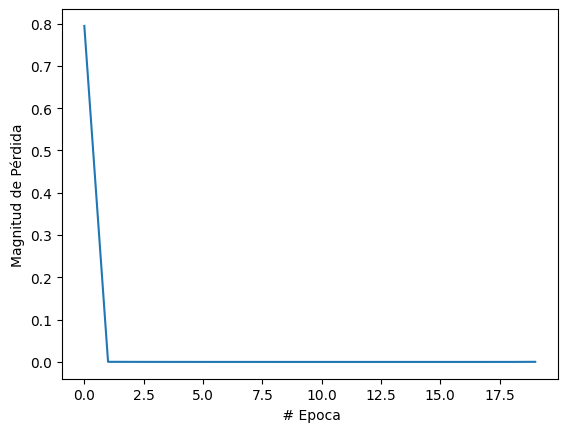

In [9]:
plt.xlabel(' # Epoca')
plt.ylabel('Magnitud de Pérdida')
plt.plot(historial.history['loss'])


### Evaluacion del Modelo 

In [12]:
test_loss = model.evaluate(test_data, test_labels)
print(f'Perdida en el conjunto de prueba {test_loss}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 7.4176e-06
Perdida en el conjunto de prueba 7.417568212986225e-06


### Prediccion de teorema de pitagoras con otros Datos 

In [14]:
nuevos_datos = np.array([[3, 4],[6, 8], [25, 60]])
hipotenusa_pred = model.predict(nuevos_datos)
print(f'Hipotenusa predicida {hipotenusa_pred}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Hipotenusa predicida [[ 5.0011263]
 [10.001489 ]
 [64.70392  ]]
